Set up working directory

In [2]:
import os
os.chdir(r'D:\Linux\Code\research\thlab\triton\ichor')
os.getcwd()

'D:\\Linux\\Code\\research\\thlab\\triton\\ichor'

Import Amphitrite and other libraries

In [ ]:
from ichorlib.msClasses.MassSpectrum import MassSpectrum
from ichorlib.genClasses.PeakPicking import PeakPicking
from ichorlib.msClasses.MsCSD import MsCSD
from ichorlib.genClasses.colorPalette import tableau20
%matplotlib inline
import matplotlib.pyplot as plt

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


#print __version__ # requires version >= 1.9.0

init_notebook_mode(connected=True)

import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

In [ ]:
filename = 'data/degQMSMS-chargeStripped.txt'
grain_param = 10
poly_order_param = 5
smoothes_param = 2
window_len_param = 10
simul_peak_fwhh = 75

ms = MassSpectrum()
ms.read_text_file(filename, grain=grain_param, normalisationtype='bpi')
ms.smoothingSG(poly_order=poly_order_param, smoothes=smoothes_param, window_len=window_len_param)
ms.normalisation_bpi()
#ms.select_ms_range(4200,9000)

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ms.plot_simulated_spectrum_simple(ax, color=tableau20[0])

#plt.show()
#plotly_fig = tls.mpl_to_plotly( fig )
#iplot(plotly_fig)

In [ ]:
def do(): 
    pp = PeakPicking()
    gradient = pp.calculate_gradient(ms.xvals, ms.yvals)
    found_peaks = pp.find_peaks(1)

    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(111)
    #ms.plot_simulated_spectrum_simple(ax, color=tableau20[0])
    for peak in found_peaks:
        peak.plotSimulatedPeak(ax, ms.xvals, fwhm=simul_peak_fwhh, color=tableau20[2])

    #plt.show()
    #plotly_fig = tls.mpl_to_plotly( fig )
    #iplot(plotly_fig)

In [ ]:
%load_ext line_profiler
%lprun -f do()

NameError: name 'ms' is not defined

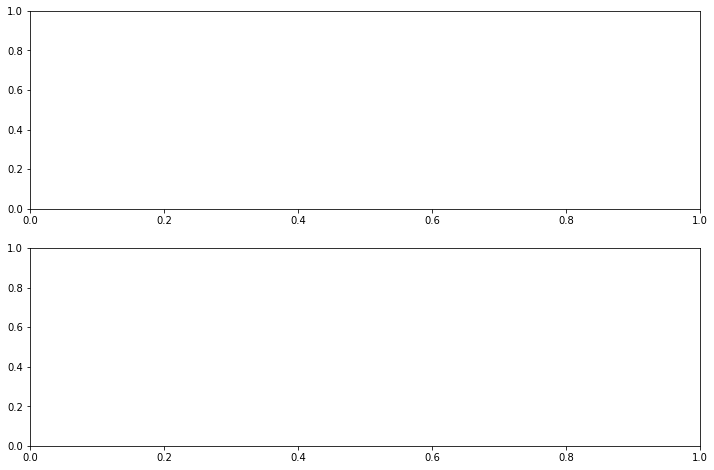

In [5]:

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(212)
ax2 = plt.subplot(211)
ms.plot_simulated_spectrum_simple(ax2, color=tableau20[0])
for peak in found_peaks:
    peak.plotSimulatedPeak(ax2, ms.xvals, fwhm=simul_peak_fwhh, color=tableau20[2])

peaks_for_csds = [
    [32,36,42,48,54],
    [38,45,50],
    [28,33,41]
    
]
    
ms.csds = []
for count, peak_set in  enumerate(peaks_for_csds):
    CSD1 = MsCSD()
    CSD1.name = 'CSD' + str(count)
    CSD1.p_fwhh = simul_peak_fwhh
    CSD1_peak_indexes = peak_set
    indexed_peaks = pp.get_peaks_using_indexes(CSD1_peak_indexes)
    CSD1.mspeaks = indexed_peaks
    CSD1.calculateMassAndCharges(CSD1.mspeaks)
    CSD1.optimiseParameters()
    CSD1.estimateCharges(5)
    CSD1.plot_residuals_per_peak(ax, CSD1.mspeaks, marker='x', color=tableau20[count])
    ms.csds.append(CSD1)

plt.plot()
plotly_fig = tls.mpl_to_plotly( fig )
iplot(plotly_fig)

[]

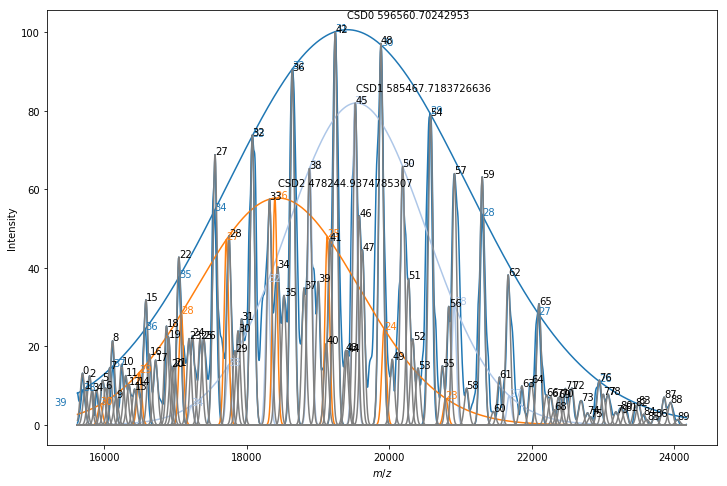

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ms.plot_simulated_spectrum_simple(ax, color=tableau20[0])

for counter, csd in enumerate(ms.csds):
    csd.plot_csd_gaussian(ax, ms.xvals, color=tableau20[counter])
    csd.plot_simulated_species(ax, ms.xvals, color=tableau20[counter])

for peak in found_peaks:
    peak.plotSimulatedPeak(ax, ms.xvals, fwhm=simul_peak_fwhh, color='grey')


plt.plot()
#plotly_fig = tls.mpl_to_plotly( fig )
#iplot(plotly_fig)

In [8]:
#CSD2.filter_theoretical_peaks_using_charges([56, 57, 58, 59])
#CSD3.filter_theoretical_peaks_using_charges([45, 46, 47, 48, 49, 50])
#CSD4.filter_theoretical_peaks_using_charges([53, 54, 55, 56, 57, 58, 58, 59, 60])
#CSD5.filter_theoretical_peaks_using_charges([64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74])

In [13]:
ms.leastSquaresOptimisation(fixed_p_fwhh=simul_peak_fwhh)
#ms.leastSquaresOptimisation()

('Optimisation took:', 0.9420108795166016, 's')
Updating CSD after optimisation
596533.9422387308 113.75867102293205 19410.63966254424 4190.881276034384
585735.0048038749 88.53199051829657 19799.14242560796 3671.0968740939734
479115.3870794987 38.89297869358453 19035.049887298886 3221.933935660858


array([5.96533942e+05, 1.13758671e+02, 1.94106397e+04, 4.19088128e+03,
       7.50000000e+01, 5.85735005e+05, 8.85319905e+01, 1.97991424e+04,
       3.67109687e+03, 7.50000000e+01, 4.79115387e+05, 3.88929787e+01,
       1.90350499e+04, 3.22193394e+03, 7.50000000e+01])

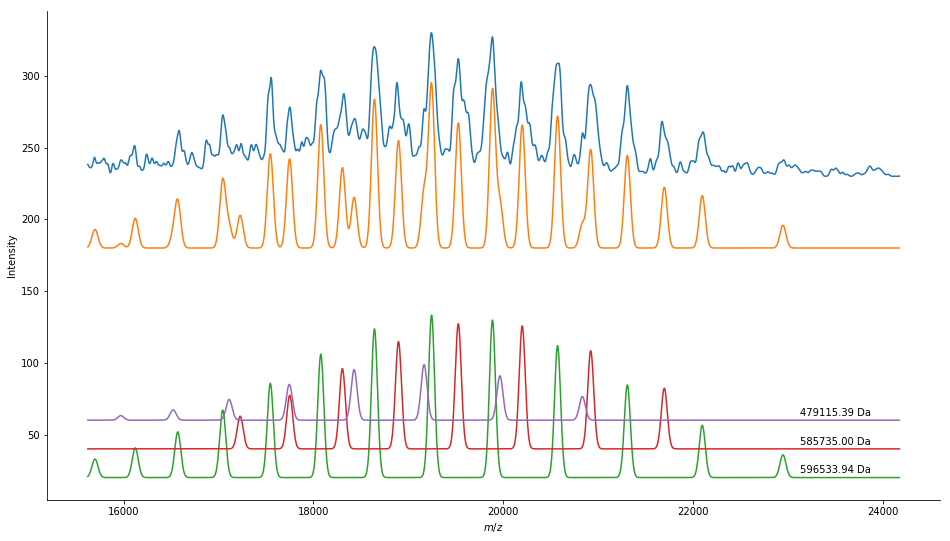

In [14]:
fig = plt.figure(figsize=(16, 9))
#plt.figure(figsize=(12, 8))
#plt.rcParams["font.family"] = "Times"
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ms.plot_simulated_spectrum(ax, showcharges='False')

plt.show()

#plotly_fig = tls.mpl_to_plotly( fig )

#iplot(plotly_fig, 'png')


[]

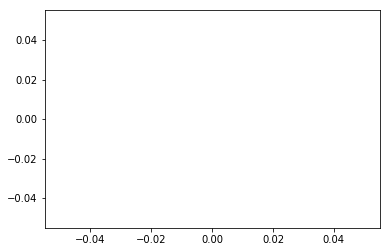

In [24]:
CSD4 = MsCSD()
CSD4.name = 'CSD4'
CSD4.p_fwhh = 10
CSD4_peak_indexes = [20,21,22,23,24,25,26,27]
indexed_peaks = pp.get_peaks_using_indexes(CSD4_peak_indexes)
CSD4.mspeaks = indexed_peaks
CSD4.calculateMassAndCharges(CSD4.mspeaks)
CSD4.optimiseParameters()
CSD4.estimateCharges(5)
#CSD2.filter_theoretical_peaks_using_charges([56, 57, 58, 59])
CSD4.plot_residuals_per_peak(ax, CSD4.mspeaks, marker='x', color='blue',)
plt.plot()

[]

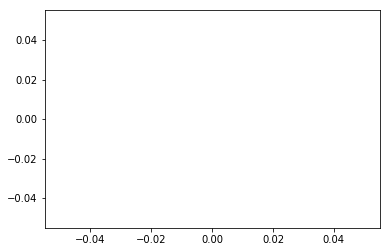

In [25]:
CSD5 = MsCSD()
CSD5.name = 'CSD5'
CSD5.p_fwhh = 10
CSD5_peak_indexes = [29,30,31,32,33,34,35]
indexed_peaks = pp.get_peaks_using_indexes(CSD5_peak_indexes)
CSD5.mspeaks = indexed_peaks
CSD5.calculateMassAndCharges(CSD5.mspeaks)
CSD5.optimiseParameters()
CSD5.estimateCharges(5)
#CSD2.filter_theoretical_peaks_using_charges([56, 57, 58, 59])
CSD5.plot_residuals_per_peak(ax, CSD5.mspeaks, marker='x', color='blue',)
plt.plot()